In [1]:
#Expoloratory Data Analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Load Data

df = pd.read_csv('Automobile_data.csv')
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [4]:
# Data Inspection

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [6]:
df.shape

(205, 26)

In [7]:
df.describe().round(2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,10.14,25.22,30.75
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,3.97,6.54,6.89
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,13.00,16.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,8.60,19.00,25.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,9.00,24.00,30.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,9.40,30.00,34.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,23.00,49.00,54.00


In [8]:
df = df[~(df["price"] == "?")]

In [9]:
df["prince"] = df["price"].astype("float64")

In [10]:
# Exploratory Data Analysis

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prince
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495,13495.0
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500,16500.0
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.4,10.0,102,5500,24,30,13950,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.4,8.0,115,5500,18,22,17450,17450.0


In [11]:
df = df[df["horsepower"] != "?" ]

In [12]:
df["horsepower"] = df["horsepower"].astype("float64")

In [13]:
df.describe().round(2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,prince
count,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00
mean,0.84,98.82,174.15,65.88,53.78,2556.03,126.82,10.18,103.40,25.20,30.68,13243.43
std,1.26,6.09,12.37,2.11,2.45,519.86,41.75,4.02,37.55,6.45,6.85,7978.71
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,48.00,13.00,16.00,5118.00
25%,0.00,94.50,166.55,64.10,52.00,2157.00,97.50,8.55,70.00,19.00,25.00,7775.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,119.00,9.00,95.00,24.00,30.00,10345.00
75%,2.00,102.40,183.50,66.70,55.55,2930.50,143.00,9.40,116.00,30.00,34.00,16501.50
max,3.00,120.90,208.10,72.00,59.80,4066.00,326.00,23.00,262.00,49.00,54.00,45400.00


In [14]:
def count_plot(data, col):
    plt.figure(figsize = (10, 5))
    sns.countplot(data = data, x = col)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation = 45);
    plt.show()

def pie_plot(data):
    plt.pie(x = data, autopct = '%1.1f%%', labels = data.index)
    plt.show()

In [15]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'prince'],
      dtype='object')

In [16]:
col = list(df.columns[2:9]) + list(df.columns[14:18])
col.pop(-2)
col

['make',
 'fuel-type',
 'aspiration',
 'num-of-doors',
 'body-style',
 'drive-wheels',
 'engine-location',
 'engine-type',
 'num-of-cylinders',
 'fuel-system']

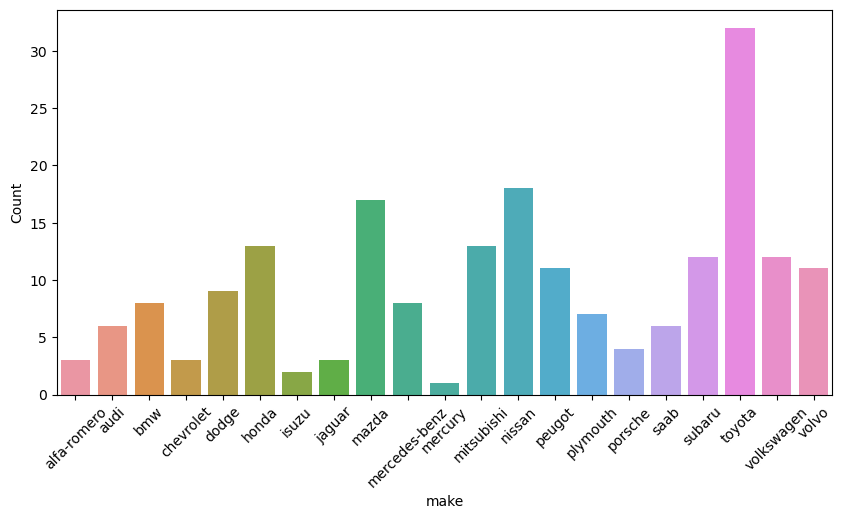

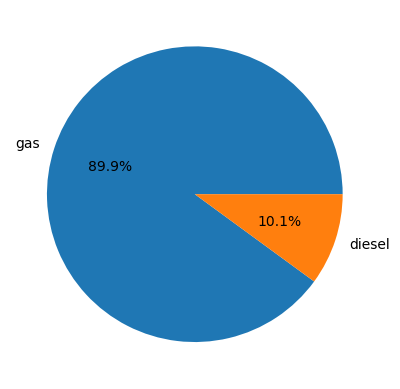

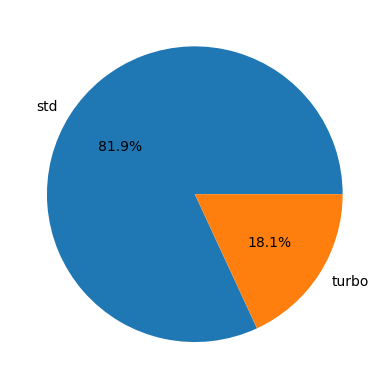

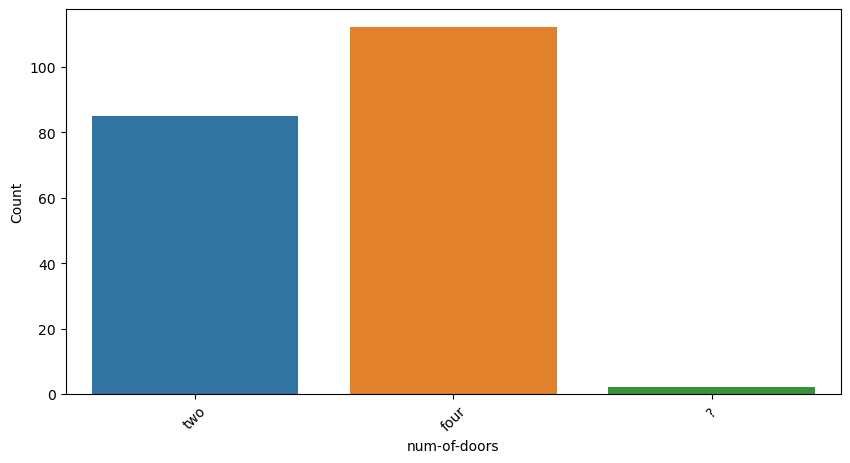

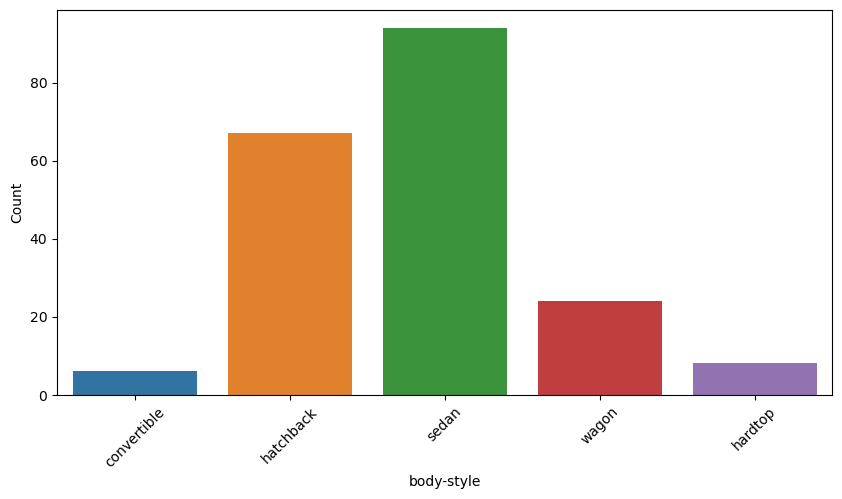

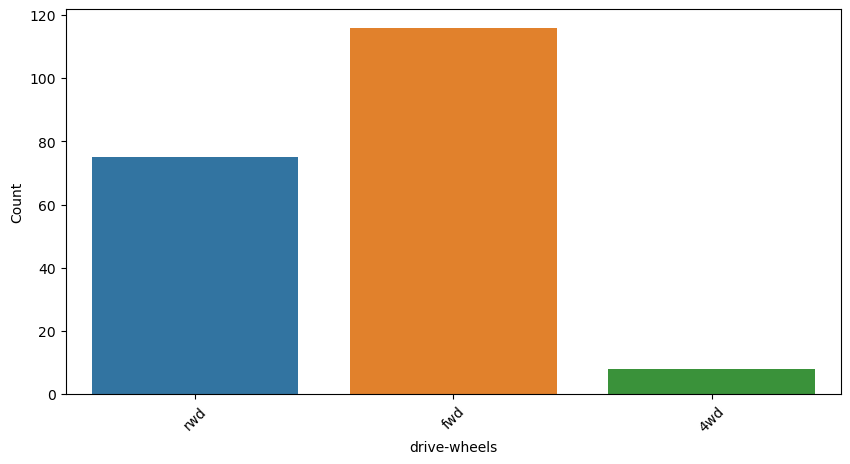

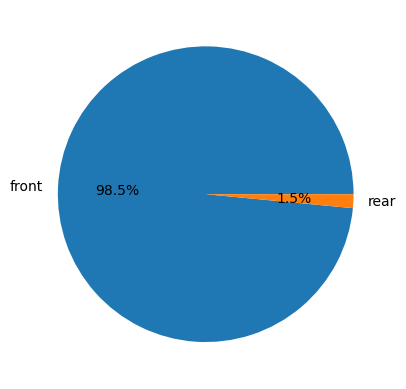

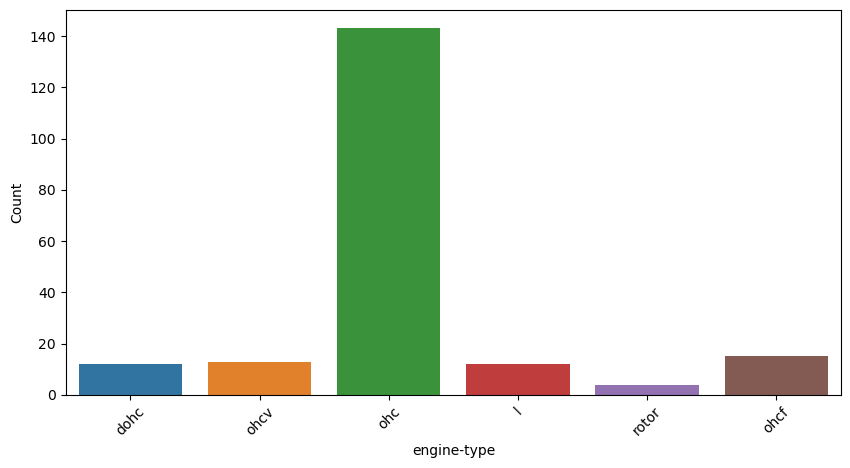

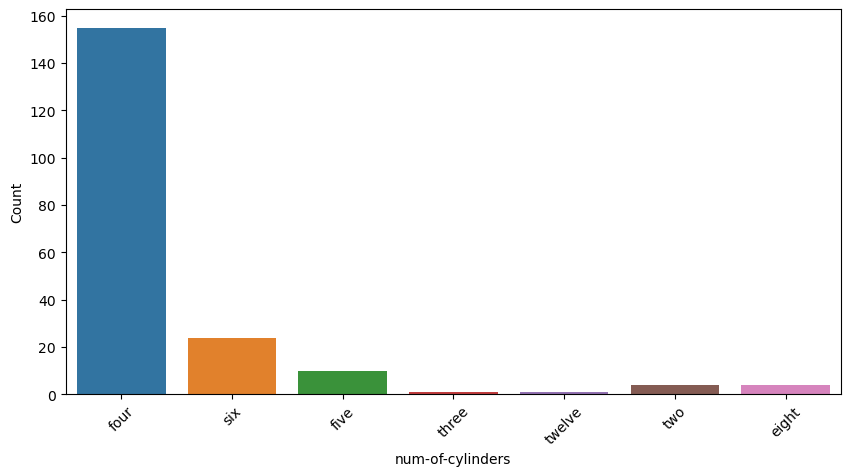

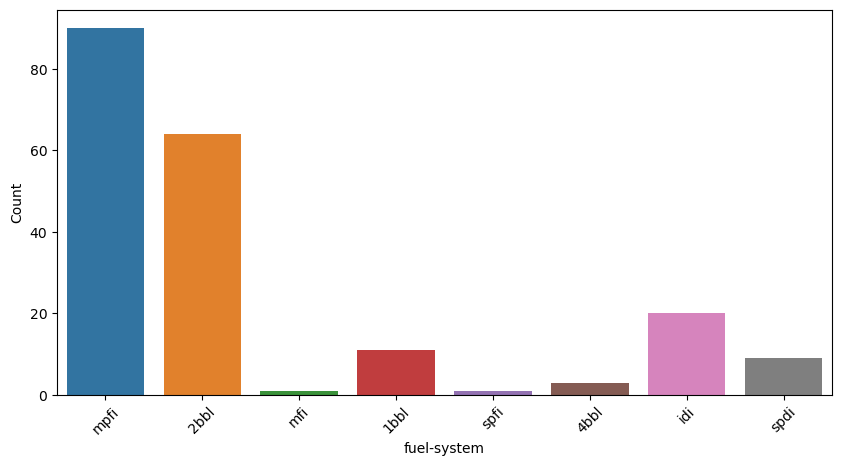

In [17]:
for x in col:
    if df[x].value_counts().shape[0] >= 3:
        count_plot(df, x)
    else :
        pie_plot(df[x].value_counts())

In [18]:
def print_count(col_name):
    print(f"\t\t Value Count Of {col_name}")
    print(df[col_name].value_counts())
    print("#" * 50)
    print()

In [19]:
for i in col:
    print_count(i)

		 Value Count Of make
make
toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
volkswagen       12
subaru           12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
saab              6
audi              6
porsche           4
alfa-romero       3
jaguar            3
chevrolet         3
isuzu             2
mercury           1
Name: count, dtype: int64
##################################################

		 Value Count Of fuel-type
fuel-type
gas       179
diesel     20
Name: count, dtype: int64
##################################################

		 Value Count Of aspiration
aspiration
std      163
turbo     36
Name: count, dtype: int64
##################################################

		 Value Count Of num-of-doors
num-of-doors
four    112
two      85
?         2
Name: count, dtype: int64
##################################################

		 Value Count Of body-style

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199 entries, 0 to 204
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          199 non-null    int64  
 1   normalized-losses  199 non-null    object 
 2   make               199 non-null    object 
 3   fuel-type          199 non-null    object 
 4   aspiration         199 non-null    object 
 5   num-of-doors       199 non-null    object 
 6   body-style         199 non-null    object 
 7   drive-wheels       199 non-null    object 
 8   engine-location    199 non-null    object 
 9   wheel-base         199 non-null    float64
 10  length             199 non-null    float64
 11  width              199 non-null    float64
 12  height             199 non-null    float64
 13  curb-weight        199 non-null    int64  
 14  engine-type        199 non-null    object 
 15  num-of-cylinders   199 non-null    object 
 16  engine-size        199 non-null

In [21]:
df.describe().round(2)

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,horsepower,city-mpg,highway-mpg,prince
count,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00,199.00
mean,0.84,98.82,174.15,65.88,53.78,2556.03,126.82,10.18,103.40,25.20,30.68,13243.43
std,1.26,6.09,12.37,2.11,2.45,519.86,41.75,4.02,37.55,6.45,6.85,7978.71
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,7.00,48.00,13.00,16.00,5118.00
25%,0.00,94.50,166.55,64.10,52.00,2157.00,97.50,8.55,70.00,19.00,25.00,7775.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,119.00,9.00,95.00,24.00,30.00,10345.00
75%,2.00,102.40,183.50,66.70,55.55,2930.50,143.00,9.40,116.00,30.00,34.00,16501.50
max,3.00,120.90,208.10,72.00,59.80,4066.00,326.00,23.00,262.00,49.00,54.00,45400.00


In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

In [24]:
df = df.dropna(subset=['price'])

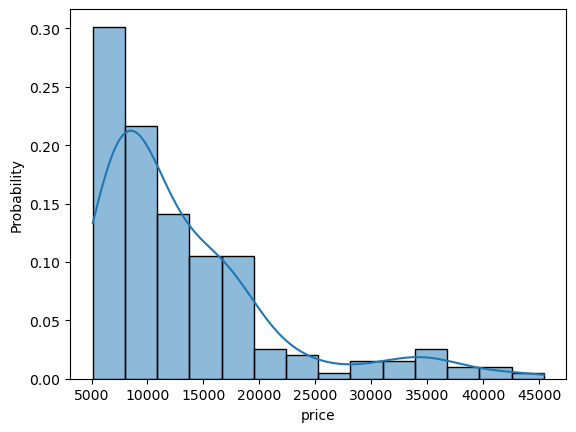

In [25]:
sns.histplot(data=df, x='price', kde=True, stat='probability')
plt.show()

In [26]:
col_num = ['symboling', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'compression-ratio', 'city-mpg', 'highway-mpg', 'price', 'horsepower']

In [27]:
def plot_dist(col):
    plt.title(f"Distribution Of {col}")
    sns.histplot(data = df, x = col, stat = 'probability', kde = True)
    plt.show()

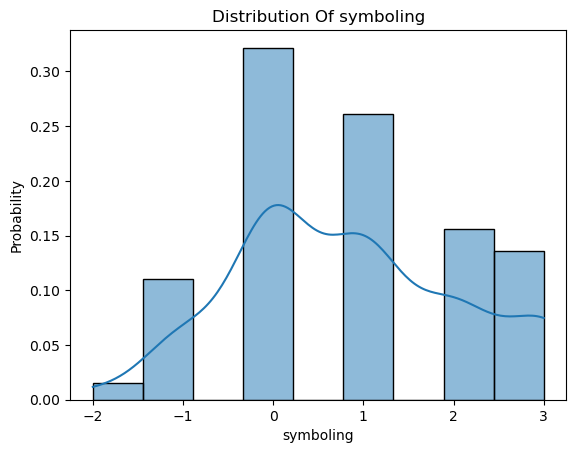

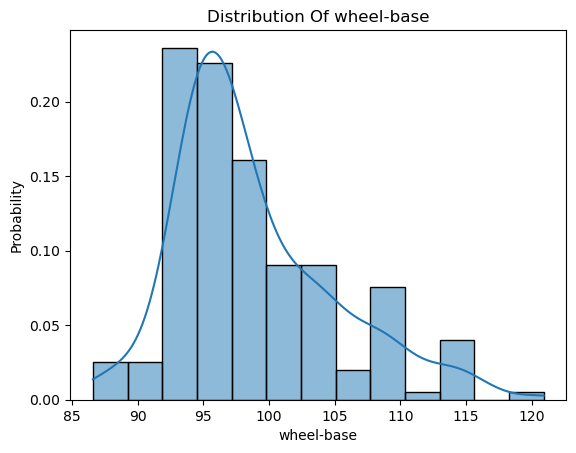

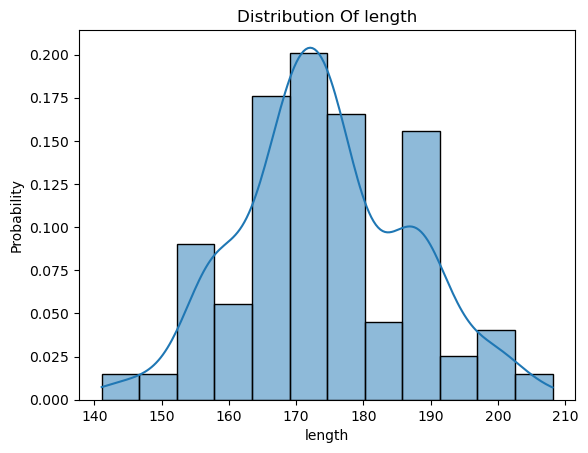

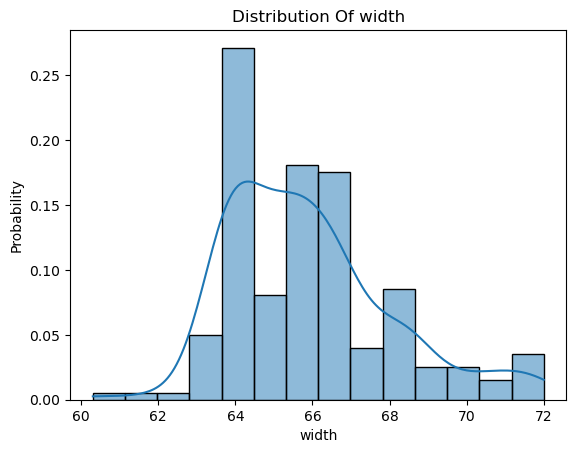

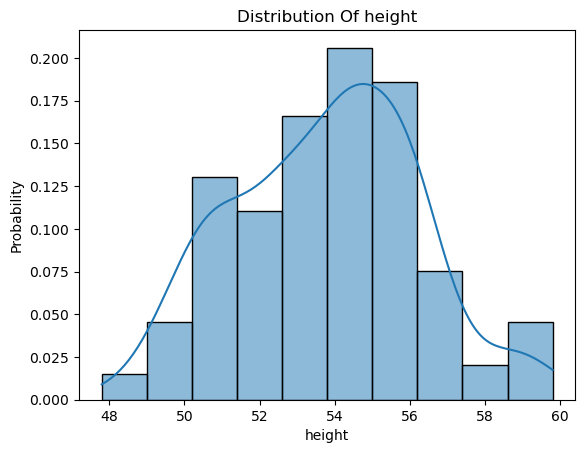

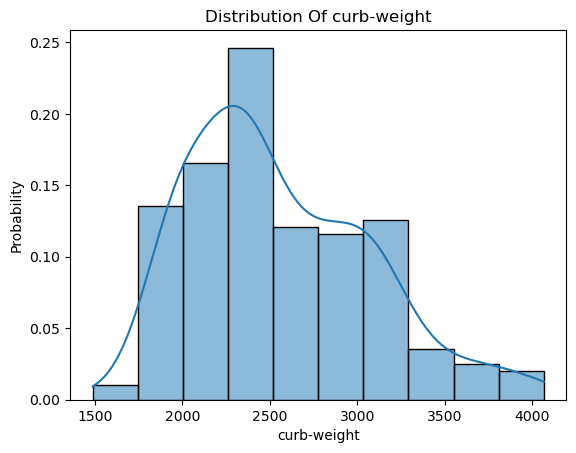

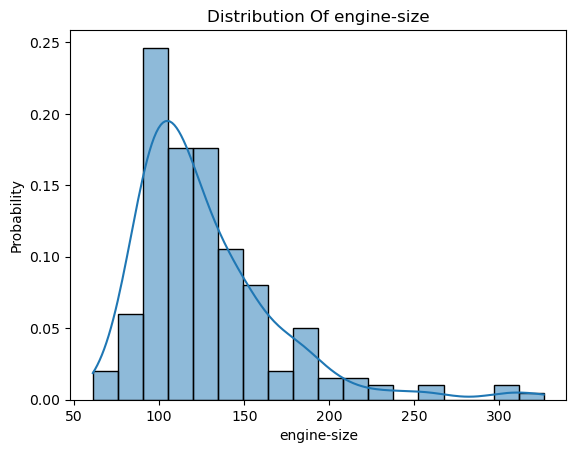

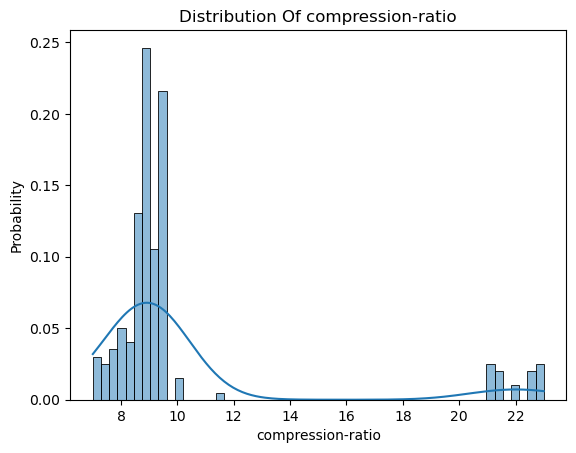

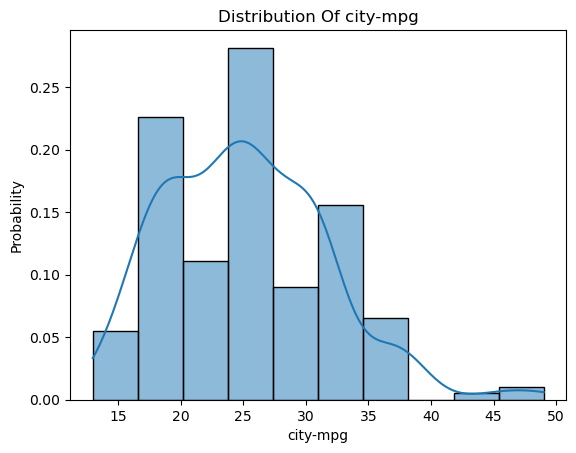

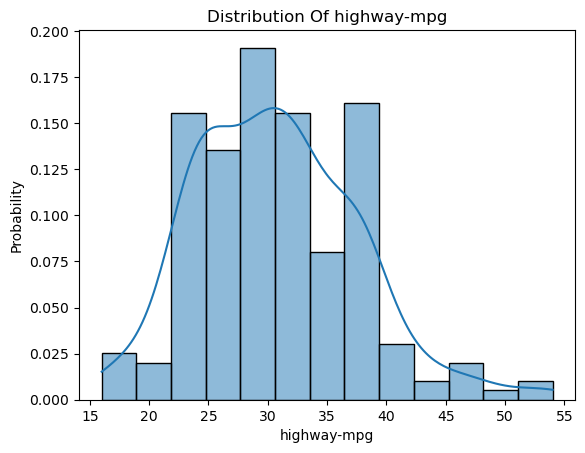

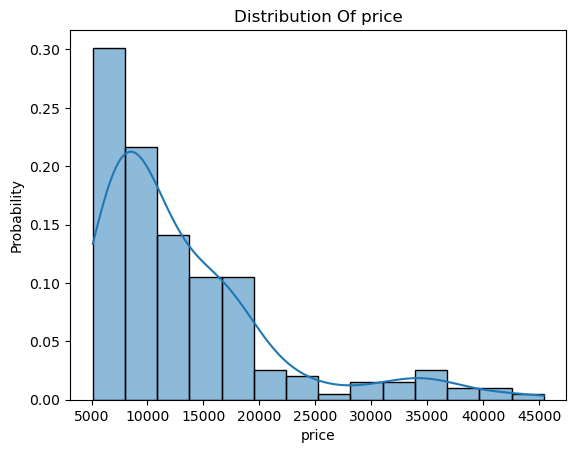

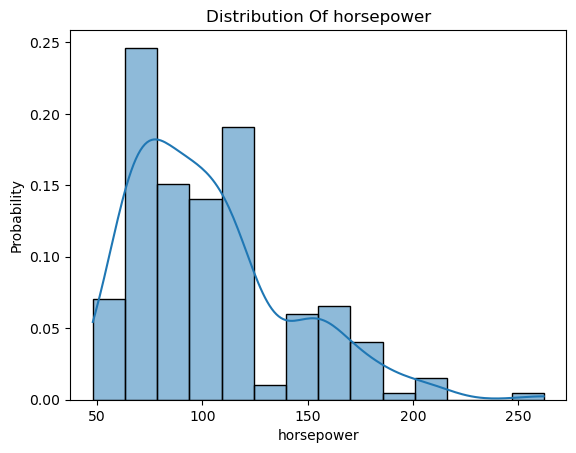

In [28]:
for i in col_num:
    plot_dist(i)

In [29]:
avg_make = df.groupby('make')['price'].mean().round(2).sort_values(ascending = False).to_frame().reset_index()
avg_make

,make,price
0,jaguar,34600.00
1,mercedes-benz,33647.00
2,porsche,31400.50
3,bmw,26118.75
4,volvo,18063.18
5,audi,17859.17
6,mercury,16503.00
7,alfa-romero,15498.33
8,peugot,15489.09
9,saab,15223.33


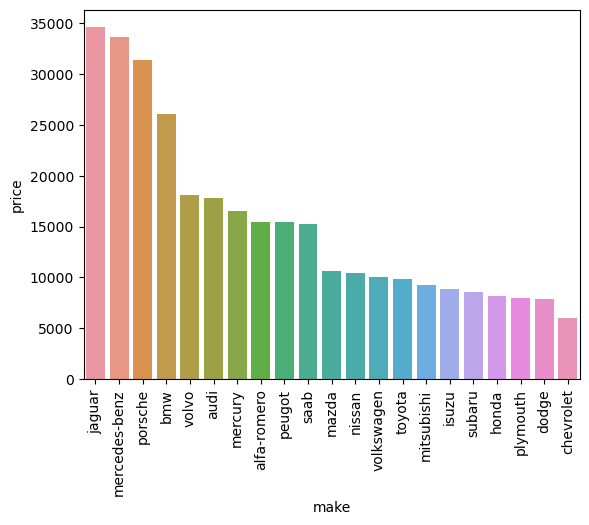

In [30]:
sns.barplot(x=avg_make['make'], y = avg_make['price'])
plt.xticks(rotation = 90);

In [31]:
df[df['price'] == df['price'].max()]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,prince
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,mpfi,3.8,3.35,8.0,184.0,4500,14,16,45400,45400.0


In [32]:
x = df.groupby('body-style')['price'].max().to_frame().reset_index().sort_values(by='price', ascending = False)
x

,body-style,price
1,hardtop,45400
3,sedan,41315
0,convertible,37028
4,wagon,28248
2,hatchback,22018


<Axes: xlabel='body-style', ylabel='price'>

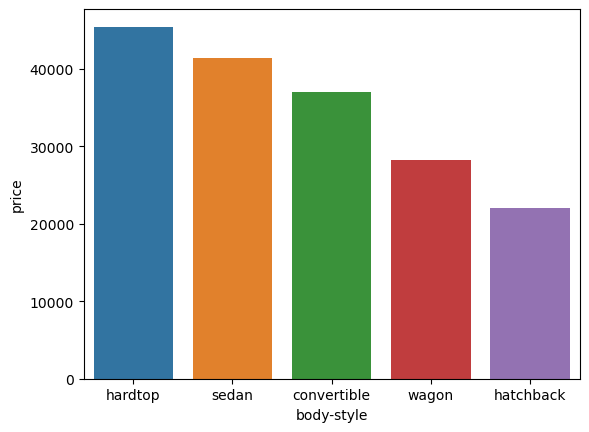

In [33]:
sns.barplot(x = x['body-style'], y = x['price'])

In [34]:
x = df.groupby('drive-wheels')['price'].max().to_frame().sort_values(by='price', ascending = False).reset_index()
x

,drive-wheels,price
0,rwd,45400
1,fwd,23875
2,4wd,17450


<Axes: xlabel='drive-wheels', ylabel='price'>

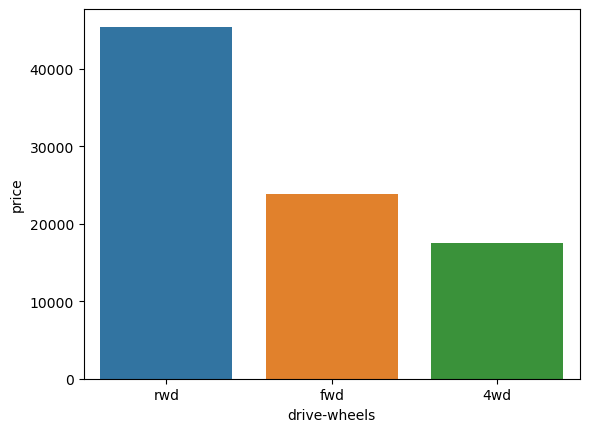

In [35]:
sns.barplot(data = x, x = 'drive-wheels', y = 'price')

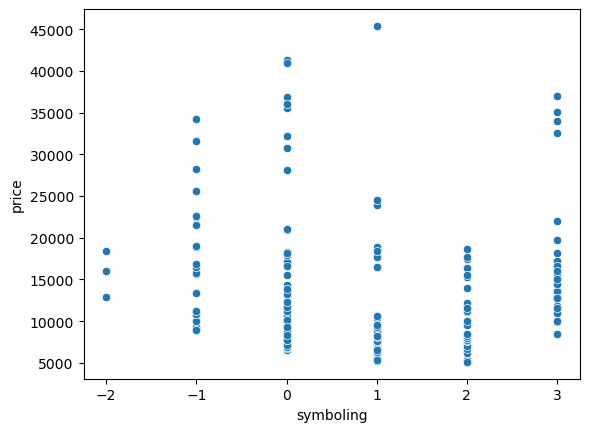

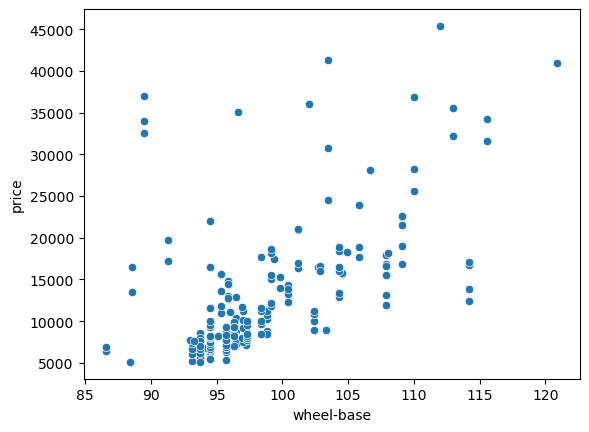

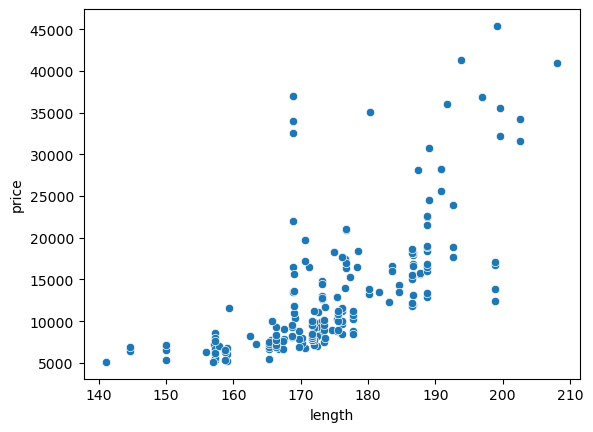

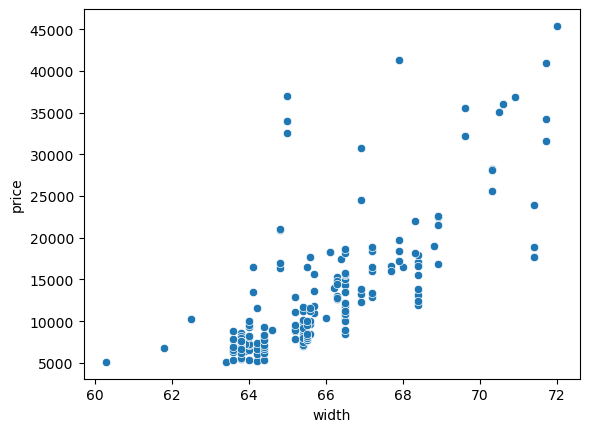

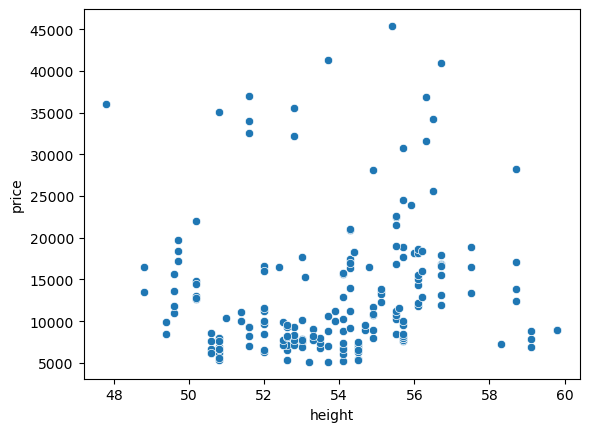

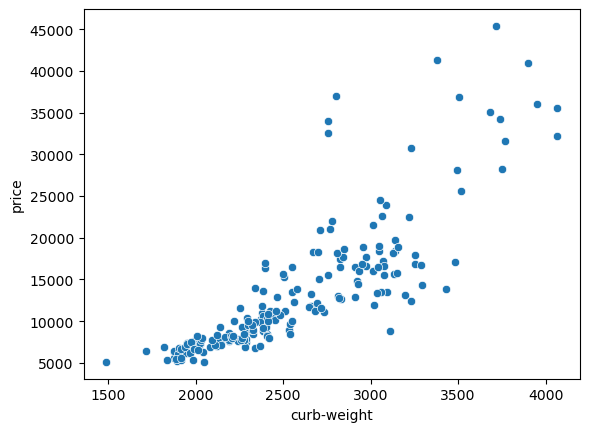

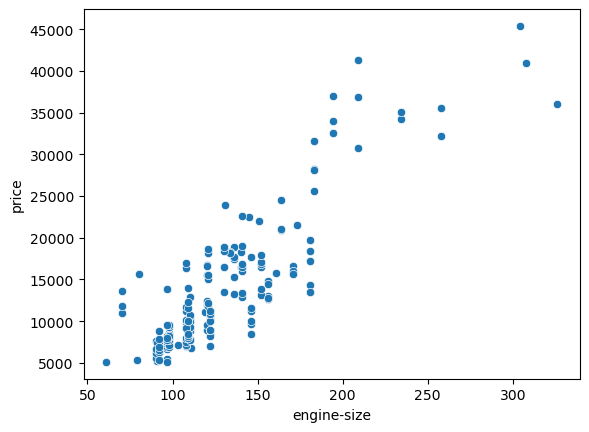

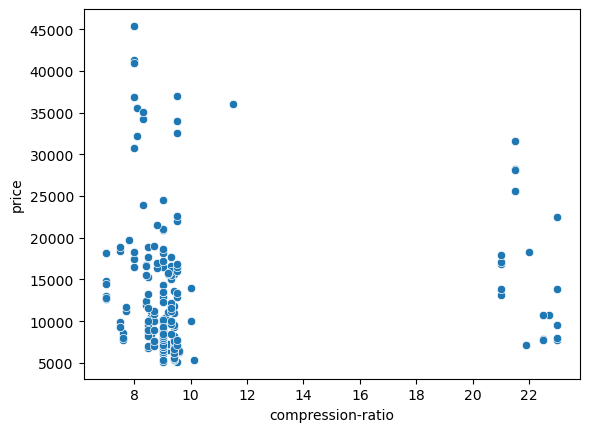

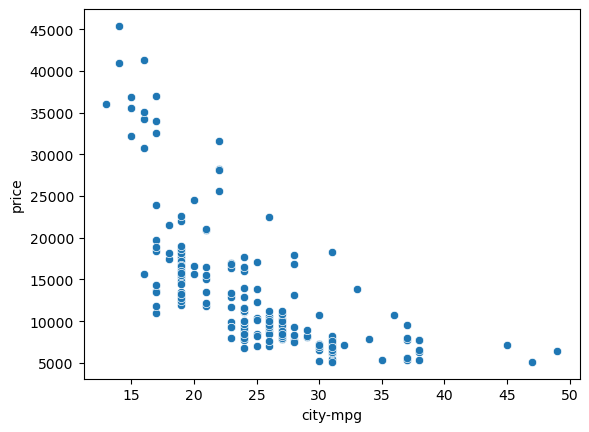

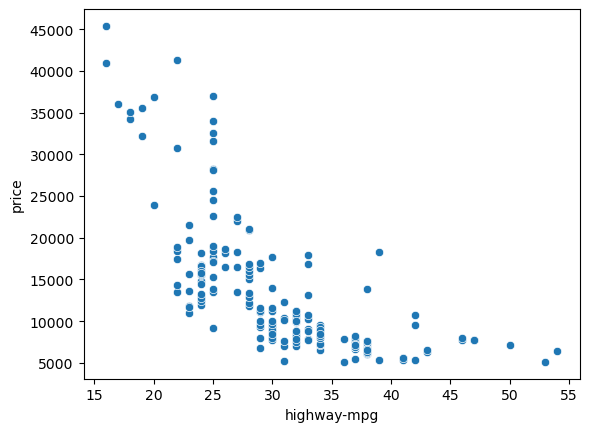

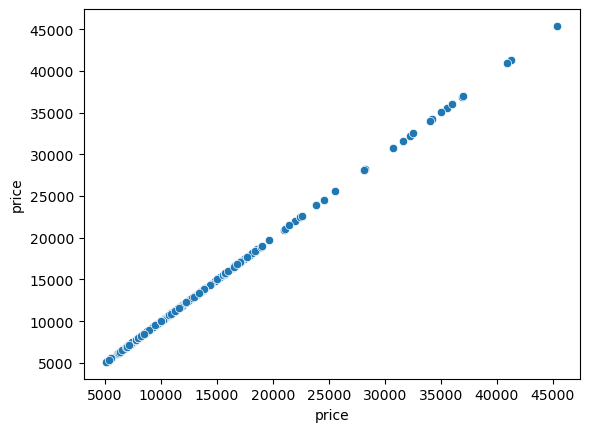

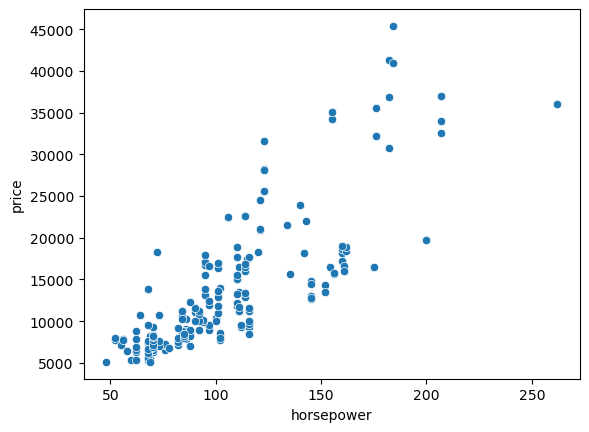

In [36]:
for i in col_num:
    sns.scatterplot(data = df, x = i, y = 'price')
    plt.show()

In [37]:
df[col_num].corr()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price,horsepower
symboling,1.000000,-0.537706,-0.365957,-0.243933,-0.546717,-0.232893,-0.111110,-0.182446,-0.035228,0.036293,-0.082465,0.076038
wheel-base,-0.537706,1.000000,0.879582,0.817145,0.592809,0.782636,0.573197,0.249088,-0.472877,-0.543647,0.583797,0.371621
length,-0.365957,0.879582,1.000000,0.857225,0.494880,0.881688,0.685260,0.161486,-0.664865,-0.699033,0.693965,0.580309
width,-0.243933,0.817145,0.857225,1.000000,0.309223,0.866965,0.729466,0.191254,-0.633139,-0.681131,0.753871,0.615315
height,-0.546717,0.592809,0.494880,0.309223,1.000000,0.307881,0.075569,0.259914,-0.051387,-0.105200,0.134990,-0.087407
curb-weight,-0.232893,0.782636,0.881688,0.866965,0.307881,1.000000,0.849301,0.156294,-0.750287,-0.794937,0.835090,0.758063
engine-size,-0.111110,0.573197,0.685260,0.729466,0.075569,0.849301,1.000000,0.029366,-0.650552,-0.679688,0.873887,0.822713
compression-ratio,-0.182446,0.249088,0.161486,0.191254,0.259914,0.156294,0.029366,1.000000,0.330587,0.268819,0.069549,-0.214576
city-mpg,-0.035228,-0.472877,-0.664865,-0.633139,-0.051387,-0.750287,-0.650552,0.330587,1.000000,0.972777,-0.689253,-0.822617
highway-mpg,0.036293,-0.543647,-0.699033,-0.681131,-0.105200,-0.794937,-0.679688,0.268819,0.972777,1.000000,-0.705230,-0.804596


<Axes: >

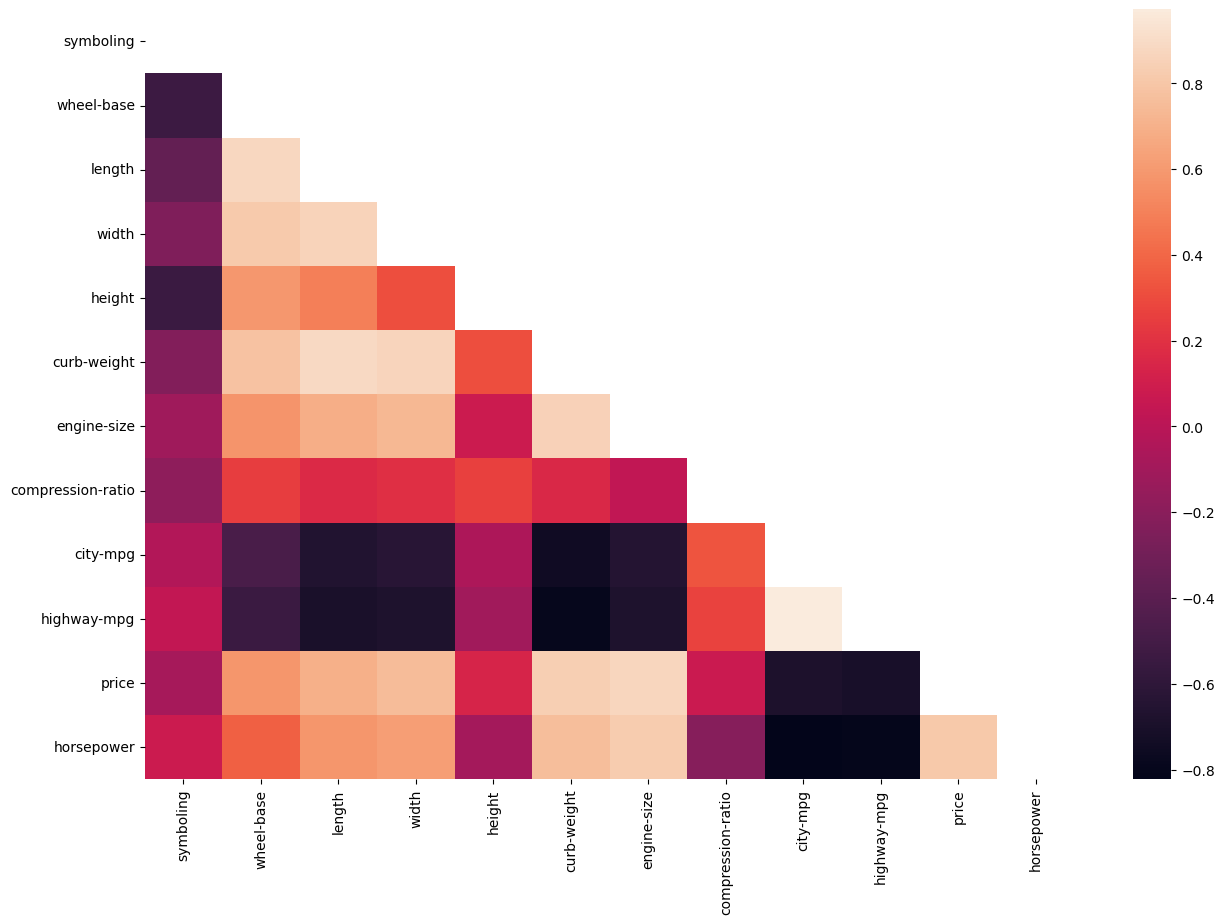

In [38]:
plt.figure(figsize = (15, 10))
mask = np.triu(np.ones_like(df[col_num].corr(), dtype=bool))
sns.heatmap(df[col_num].corr(), annot = True, mask = mask)

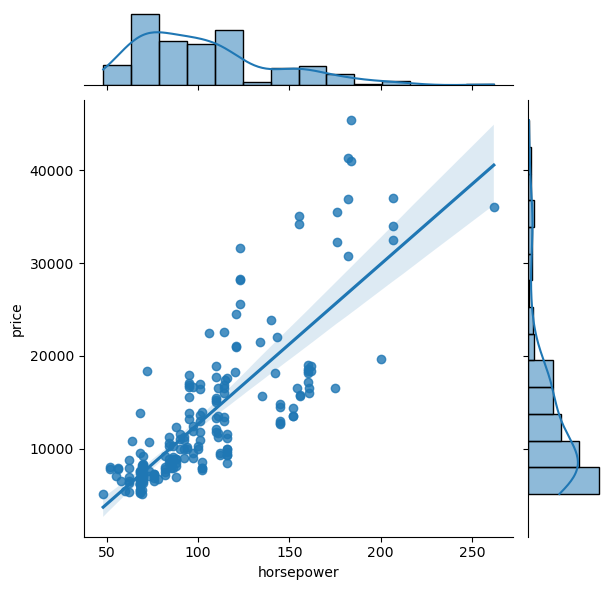

In [48]:
sns.jointplot(data=df, x = 'horsepower', y = 'price', kind = 'reg')

In [49]:
x = pd.pivot_table(data = df, index = ['make', 'body-style'], values = ['price'], aggfunc = 'mean').sort_values(by='price', ascending = False)
x

price
make          body-style               
porsche       convertible  37028.000000
mercedes-benz hardtop      36788.000000
              convertible  35056.000000
jaguar        sedan        34600.000000
porsche       hardtop      33278.000000
mercedes-benz sedan        33074.000000
              wagon        28248.000000
bmw           sedan        26118.750000
porsche       hatchback    22018.000000
audi          wagon        18920.000000
volvo         sedan        18726.875000
toyota        convertible  17669.000000
audi          sedan        17647.000000
mercury       hatchback    16503.000000
alfa-romero   hatchback    16500.000000
volvo         wagon        16293.333333
peugot        sedan        15758.571429
saab          sedan        15433.333333
peugot        wagon        15017.500000
saab          hatchback    15013.333333
alfa-romero   convertible  14997.500000
nissan        hatchback    14409.000000
volkswagen    wagon        12290.000000
              convertible  11595.000000
mazda         sedan        11464.142857
isuzu         hatchback    11048.000000
mazda         hatchback    10085.000000
volkswagen    hatchback     9980.000000
honda         sedan         9945.000000
nissan        wagon         9915.666667
toyota        wagon         9836.000000
              hardtop       9762.333333
volkswagen    sedan         9673.888889
toyota        hatchback     9616.000000
mitsubishi    hatchback     9597.888889
toyota        sedan         9542.200000
subaru        wagon         9342.000000
              sedan         9070.600000
plymouth      wagon         8921.000000
dodge         wagon         8921.000000
nissan        sedan         8604.555556
mitsubishi    sedan         8434.000000
nissan        hardtop       8249.000000
plymouth      hatchback     8130.500000
dodge         hatchback     7819.800000
              sedan         7619.666667
honda         wagon         7295.000000
plymouth      sedan         7150.500000
honda         hatchback     7054.428571
isuzu         sedan         6785.000000
subaru        hatchback     6591.333333
chevrolet     sedan         6575.000000
              hatchback     5723.000000

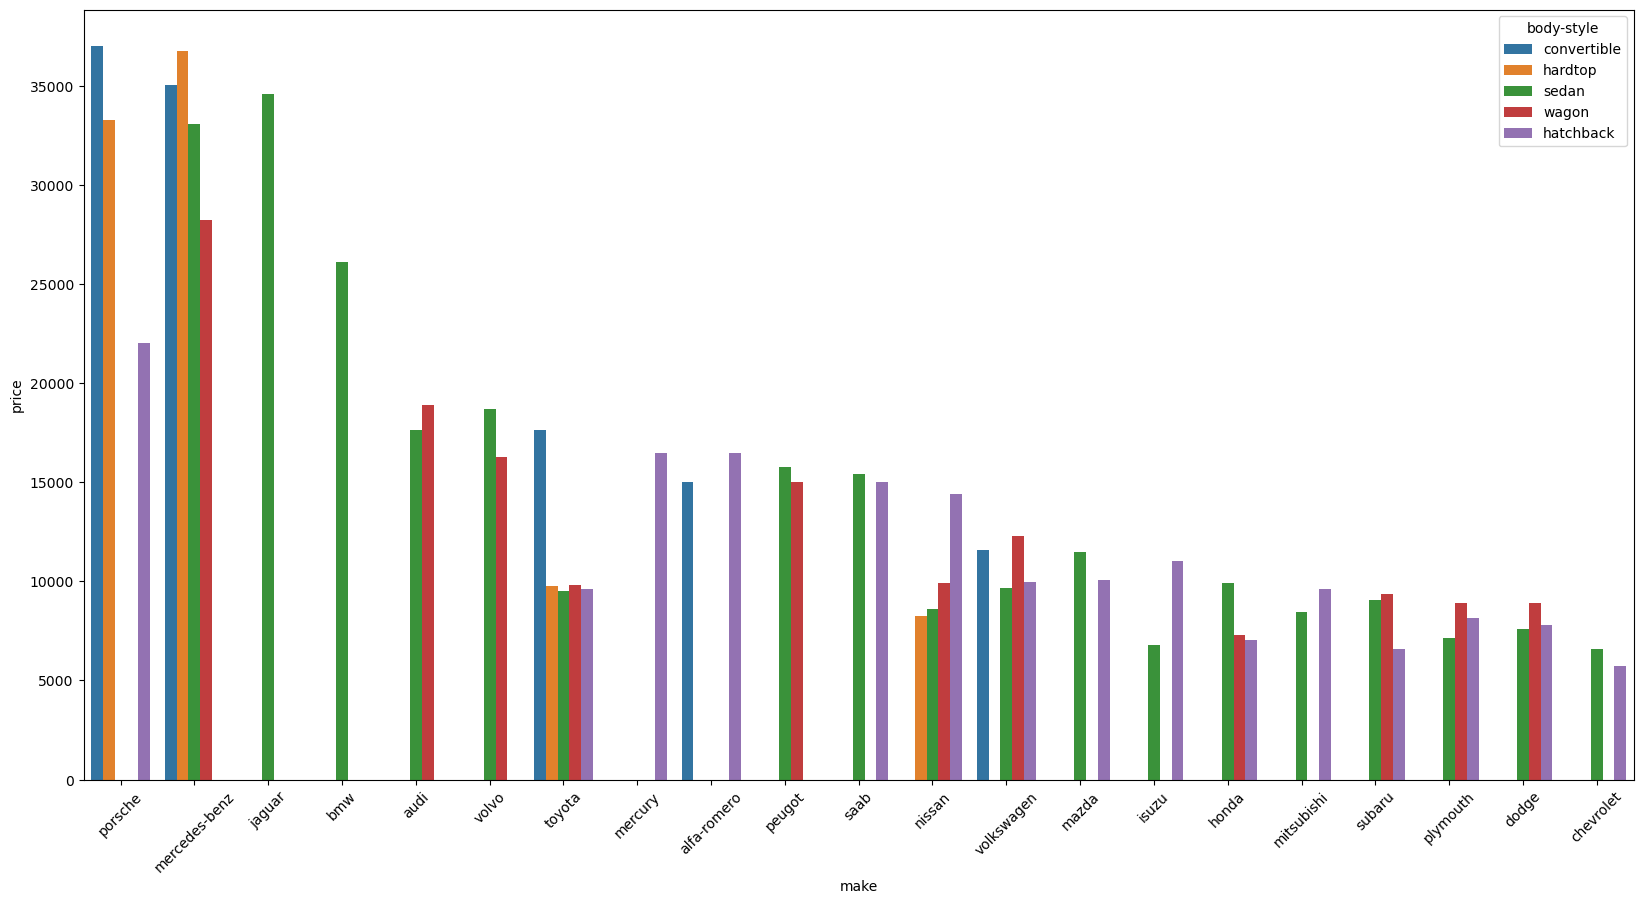

In [50]:
y = x.reset_index()
plt.figure(figsize = (20, 10))
sns.barplot(data= y, x = 'make', y = 'price', hue = 'body-style')
plt.xticks(rotation = 45);